**2016-05-16** - try using PY's StellarDensityMap to move towards a microlensing recovery metric

Example of using the stellar luminosity function

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [15]:
# Set up the database connection
opsdb = db.OpsimDatabase('minion_1016_sqlite.db')
outDir = 'starMap_test'
resultsDb = db.ResultsDb(outDir=outDir)

In [22]:
help(metrics.StarDensityMetric)

Help on class StarDensityMetric in module lsst.sims.maf.metrics.starDensity:

class StarDensityMetric(lsst.sims.maf.metrics.baseMetric.BaseMetric)
 |  Interpolate the stellar luminosity function to return the number of
 |  stars per square arcsecond brighter than the rmagLimit. Note that the
 |  map is built from CatSim stars in the range 20 < r < 28.
 |  
 |  Method resolution order:
 |      StarDensityMetric
 |      lsst.sims.maf.metrics.baseMetric.BaseMetric
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, rmagLimit=25.0, units='stars/sq arcsec', maps=['StellarDensityMap'], **kwargs)
 |  
 |  run(self, dataSlice, slicePoint=None)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from lsst.sims.maf.metrics.baseMetric.BaseMetric:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ---

In [17]:
help(maps.stellarDensityMap)

Help on module lsst.sims.maf.maps.stellarDensityMap in lsst.sims.maf.maps:

NAME
    lsst.sims.maf.maps.stellarDensityMap

FILE
    /Users/clarkson/Progs/python/LSST/mafForkTest/sims_maf/python/lsst/sims/maf/maps/stellarDensityMap.py

CLASSES
    lsst.sims.maf.maps.baseMap.BaseMap(__builtin__.object)
        StellarDensityMap
    
    class StellarDensityMap(lsst.sims.maf.maps.baseMap.BaseMap)
     |  Return the cumulative stellar luminosity function for each slicepoint. Units of stars per sq degree.
     |  Uses a healpix map of nside=64. Uses the nearest healpix point for other ra,dec values.
     |  
     |  Method resolution order:
     |      StellarDensityMap
     |      lsst.sims.maf.maps.baseMap.BaseMap
     |      __builtin__.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, startype='allstars', filtername='r')
     |      Parameters
     |      ----------
     |      
     |      startype : str ('allstars', 'wdstars')
     |          Load the lumin

In [39]:
bundleList = []
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=64, useCache=False)
metric = metrics.StarDensityMetric(rmagLimit=27.5, metricName='iMag < 27.5') # try 27.5
# setup the stellar density map to use. By default, all stars in the CatSim catalog are included
mafMap = maps.StellarDensityMap(filtername='i')
plotDict = {'colorMin':0.001, 'colorMax':.1, 'logScale':True}
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)

metric = metrics.StarDensityMetric(rmagLimit=20.5,metricName='iMag < 20.5')
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint night < 1095
Found 740920 visits
Running:  ['opsim_iMag_lt_27_5_night_lt_1095_HEAL', 'opsim_iMag_lt_20_5_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 1095 sqlconstraint now.
monopole: 0.0289183  dipole: lon: -98.0993, lat: -1.20808, amp: 0.0485002
monopole: 0.00313717  dipole: lon: -100.388, lat: -7.6957, amp: 0.00491081
Plotting complete.


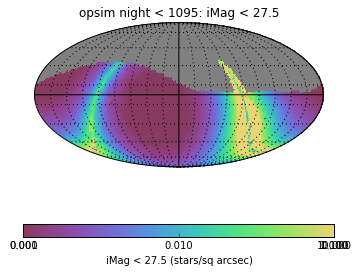

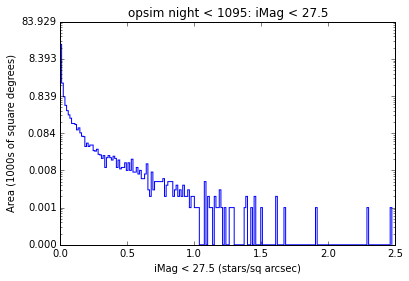

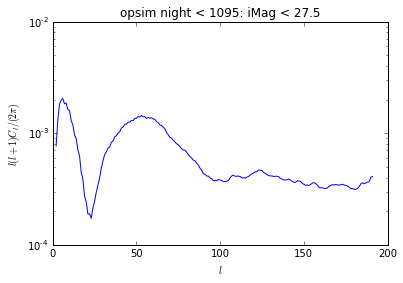

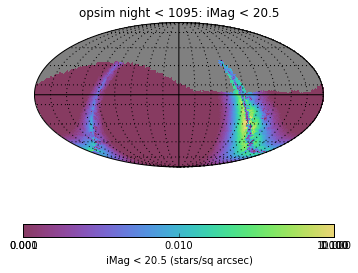

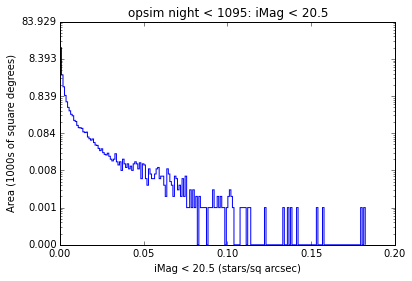

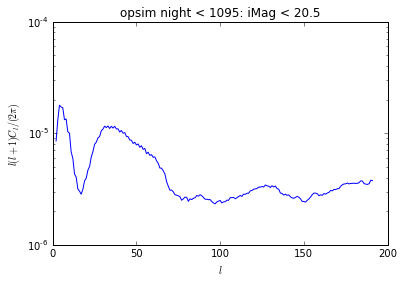

In [40]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Now try it again with the White Dwarf density maps

In [5]:
bundleList = []
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=64, useCache=False)
metric = metrics.StarDensityMetric(metricName='WhiteDwarfs_rmag<25')
mafMap = maps.StellarDensityMap(startype='wdstars')
plotDict = {'colorMin':0.0001, 'colorMax':0.01, 'logScale':True}
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)

metric = metrics.StarDensityMetric(rmagLimit=27.5,metricName='WhiteDwarfs_rmag<28')
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint night < 1095
Found 742544 visits
Running:  ['opsim_WhiteDwarfs_rmaglt28_night_lt_1095_HEAL', 'opsim_WhiteDwarfs_rmaglt25_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 1095 sqlconstraint now.
monopole: 0.000215989  dipole: lon: -107.053, lat: -23.9824, amp: 0.000301148

Optimal bin calculation tried to make 861 bins, returning 200
Optimal bin calculation tried to make 301 bins, returning 200



monopole: 2.91987e-05  dipole: lon: -124.771, lat: -42.643, amp: 2.76581e-05
Plotting complete.


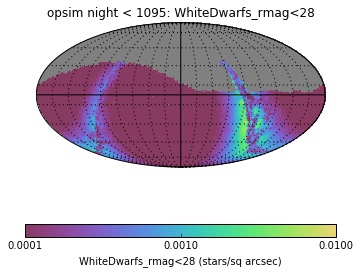

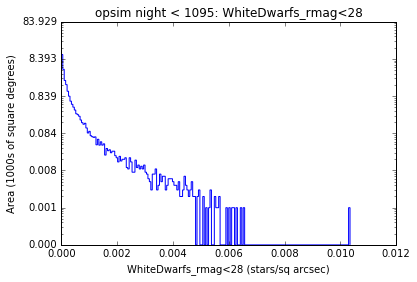

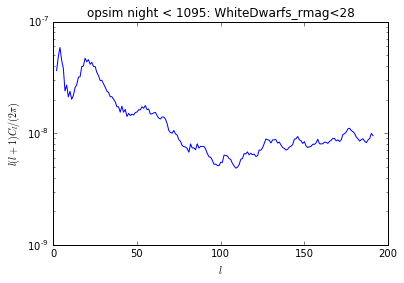

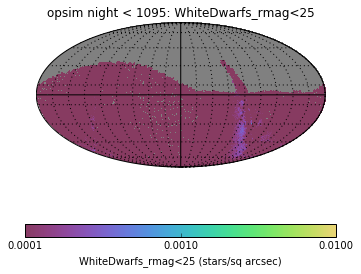

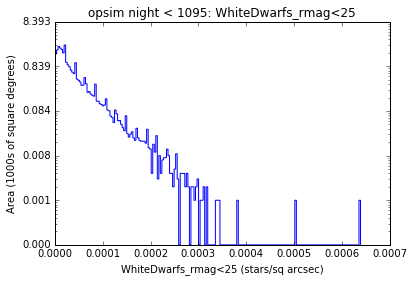

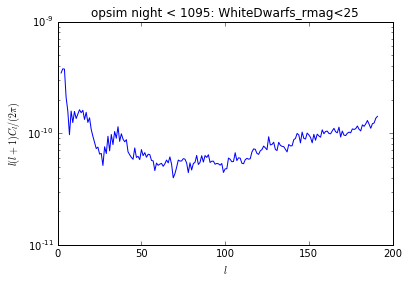

In [6]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)